<a href="https://colab.research.google.com/github/UofGAnalytics/BOLDscalable/blob/master/coursematerial/week7/LSTM_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 12, 10



In [ ]:
airline_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

## Normalise and convert to numpy float

In [ ]:
pass_data = airline_data.Passengers.values.astype(np.float32)
month = np.arange(len(pass_data))
pass_data -= np.min(pass_data)
pass_data /= np.max(pass_data)


## Hold back the last year of data as a test dataset

In [ ]:
test_size = 12
train_size = len(pass_data) - test_size

train, test = pass_data[:train_size], pass_data[train_size:]
month_train, month_test = month[:train_size], month[train_size:]

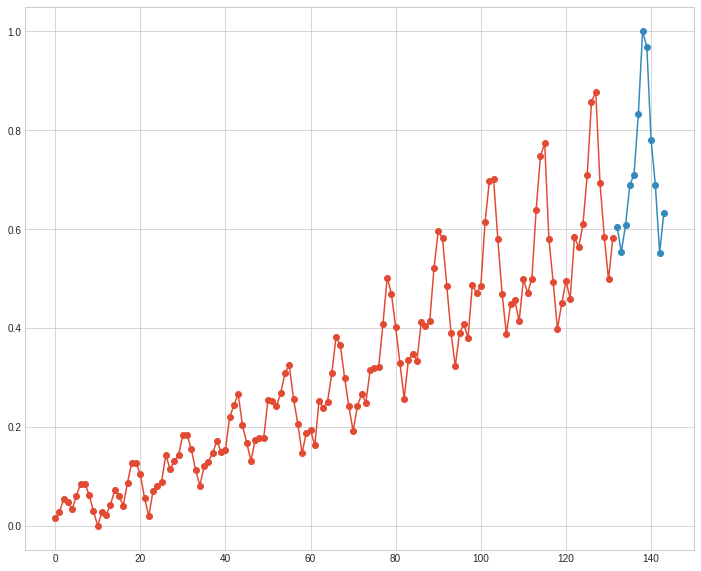

In [6]:
plt.plot(month_train,train,'-o')
plt.plot(month_test,test,'-o')
plt.show()

In [ ]:

n_window = 12  # we'll train on 12 months of data
n_input =  1   # dimension of the input data
n_output = 1   # dimension of the prediction


## Create training batches

In [ ]:


trainX, trainY = [], []
for i in range(len(train)-n_window):
    trainX.append(train[i:i + n_window])
    trainY.append(train[i + n_window])

trainX, trainY = np.array(trainX), np.array(trainY)


# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],n_input))
trainY = np.reshape(trainY, (trainY.shape[0],n_output))



## Create the RNN

In [ ]:
rnn_layer = tf.keras.layers.LSTM(units=128)
prediction_layer = tf.keras.layers.Dense(1)

def predict(x):

    x = rnn_layer(x)
    prediction = prediction_layer(x)

    return prediction

def loss(x,y):
    prediction = predict(x)
    loss = tf.reduce_mean(tf.square(prediction - y))  
    return loss

## Run the training

In [ ]:
lr = 0.01
train_steps = 5000
optimizer = tf.optimizers.Adam(lr)

In [15]:

for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(trainX,trainY)
    gradients = tape.gradient(current_loss, tape.watched_variables())
    optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
    if i%500 == 0:
        print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))


Training Step:0 Loss = tf.Tensor(0.17736305, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(0.0007701495, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(0.00061939296, shape=(), dtype=float32)
Training Step:1500 Loss = tf.Tensor(0.00031239062, shape=(), dtype=float32)


## Plot the predictions for each month

In [ ]:
allX = []
for i in range(len(pass_data)-n_window):
    allX.append(pass_data[i:i + n_window])
    

allX = np.array(allX)


# reshape input
allX = np.reshape(allX, (allX.shape[0], allX.shape[1],n_input))

# y_pred = sess.run(prediction, feed_dict={x: allX})
y_pred = predict(allX)

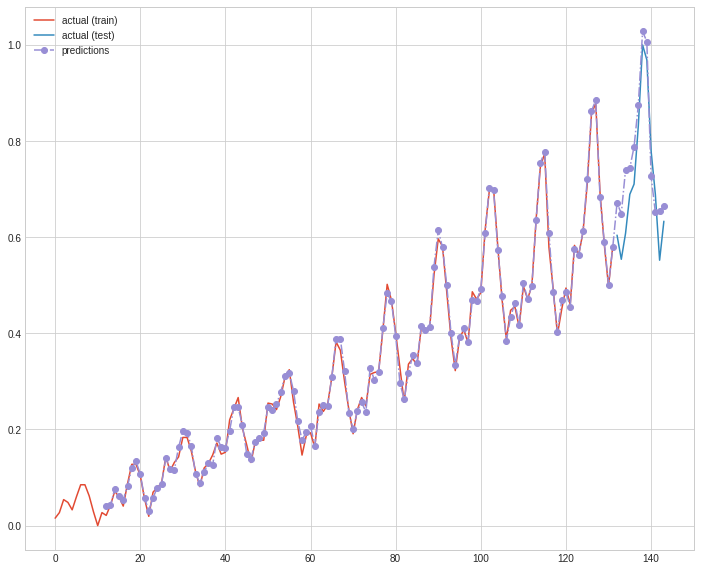

In [19]:


plt.plot(month_train,train,label='actual (train)')
plt.plot(month_test,test,label='actual (test)')
plt.plot(month[n_window:],y_pred,'-.o',label='predictions')
plt.legend(loc='best')
plt.show()